In [1]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [7]:
ds_name = 'DM_0528'
classe = '1S'

latex_info = {}
latex_info['titre'] = 'DM 7' 
latex_info['classe'] = '\\premiereS'
latex_info['date'] = '28 mai 2015'
latex_info

{'classe': '\\premiereS', 'date': '28 mai 2015', 'titre': 'DM 7'}

# Import et premiers traitements

In [22]:
notes = pd.ExcelFile("./../../../notes_"+classe+".xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [23]:
notes.index

Index(['DM_0528', 'av_arrondi', 'Retard', 'subj_num', 'Exercice 1',
       '1 (placer angle)', '2.a (calcul prod scal)', '2.b (calcul prod scal)',
       'Exercice 2', '1.a (domaine def)', '1.b (domaine def)',
       '1.c (domaine def)', '2.a (dommaine def)', '2.b (dérivation)',
       '2.c (signe et variations)', '2.d (tangente)', 'Exercice 3',
       '1 (termes suite)', '2.a (termes suites)', '2.b (géométrique)',
       '2.c (Explicite)', '2.d (Explicite)', '3 (algorithme)',
       '4 (algorithme)'],
      dtype='object')

In [24]:
notes = notes.T

In [25]:
notes = notes.drop('av_arrondi', axis=1)
notes = notes.drop('subj_num', axis=1)

In [26]:
barem = notes[:1]
notes = notes[1:]
#notes

## Supression des notes inutiles 

In [27]:
notes = notes[notes[ds_name].notnull()]
notes = notes[notes[ds_name] != 0]

In [28]:
notes = notes.astype(float)

## Traitement des notes

In [29]:
notes.T.index

Index(['DM_0528', 'Retard', 'Exercice 1', '1 (placer angle)',
       '2.a (calcul prod scal)', '2.b (calcul prod scal)', 'Exercice 2',
       '1.a (domaine def)', '1.b (domaine def)', '1.c (domaine def)',
       '2.a (dommaine def)', '2.b (dérivation)', '2.c (signe et variations)',
       '2.d (tangente)', 'Exercice 3', '1 (termes suite)',
       '2.a (termes suites)', '2.b (géométrique)', '2.c (Explicite)',
       '2.d (Explicite)', '3 (algorithme)', '4 (algorithme)'],
      dtype='object')

In [30]:
list_exo = ["Exercice 1", "Exercice 2", "Exercice 3"]

In [31]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

In [32]:
item_avec_note = list_exo + [ds_name, "Retard"]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1 (placer angle)',
 '2.a (calcul prod scal)',
 '2.b (calcul prod scal)',
 '1.a (domaine def)',
 '1.b (domaine def)',
 '1.c (domaine def)',
 '2.a (dommaine def)',
 '2.b (dérivation)',
 '2.c (signe et variations)',
 '2.d (tangente)',
 '1 (termes suite)',
 '2.a (termes suites)',
 '2.b (géométrique)',
 '2.c (Explicite)',
 '2.d (Explicite)',
 '3 (algorithme)',
 '4 (algorithme)']

In [33]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [34]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [35]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [36]:
len(notes.T.index)

22

# Preparation du fichier .tex

In [37]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [38]:
notes[ds_name].describe()

count    27.000000
mean     13.314815
std       4.233902
min       6.000000
25%       9.000000
50%      13.500000
75%      17.000000
max      20.000000
Name: DM_0528, dtype: float64

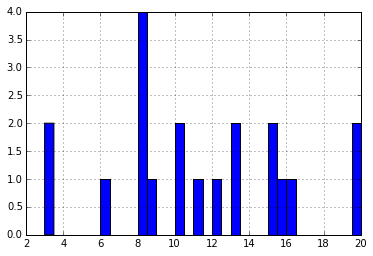

In [34]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [35]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [36]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1.1  1.2  2.A.1  2.A.2  2.A.3.a  2.A.3.b  2.A.3.c  2.B.1  2.B.2  3.A.1  \
count  NaN  NaN    NaN    NaN      NaN      NaN      NaN    NaN    NaN    NaN   

       3.A.2  3.B.1  3.B.2  3.B.3  4.A.1  4.A.1.a  4.A.1.b  4.B.1  4.B.2  \
count    NaN    NaN    NaN    NaN    NaN      NaN      NaN    NaN    NaN   

       4.B.3  
count    NaN